# **<ins style="color:aqua">Feature Engineering</ins>**
## **<ins style="color:green">Handling Missing Values</ins>**
1. ### **<ins style="color:red">(CCA : Complete Case Analysis)</ins>**
   - Remove Hole Row in which NaN value present.
   - Data missing must be random.
   - Complete Case Analysis(CCA), also called "List-Wise Deletion" of cases, consists in discarding observations(Row) where values in any of the variables(Column) are missing.
   - Complete Case Analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset.
   - __Assumption For CCA:__ MCAR : Missing Completely at Random
   - __Advantage__ :
     - Easy to implement as no data manipulation required.
     - Preserves variable distribution (if data is MCAR), then the distribution of the variables of the reduced dataset should match the distribution in the original dataset.
   - __Disadvantage__:
     - It can exclude a large fraction of the original dataset (If mising data is abundant).
     - Excluded observations could be informative for the analysis (if data is not missing at random).
     - When using our models in production, the model will not know how to handle missing data.
   - __When to use CCA.__
     - MCAR : Missing Completely At Random
     - Percentage of the Missing data in column should be high. If percentage of missing data in a column is low then do not apply CCA.

3. ### **<ins style="color:red">Impute(Fill NaN Value)</ins>**
   - #### **Univariate** : _SimpleImputer_ Class Present in Scikit Learn for the _Univariate_.
   - If in a column any missing value is present then fill it using the remain data present in that column.
     - <ins style="color:blue"> __Numerical Type Column__ </ins>
       - Method to fill the Numerical Columns Missing Values.
         - Mean
         - Median
         - Random Value
         - End of Distribution Value
     - <ins style="color:blue"> __Categorical Type Column__ </ins>
       - Method to fill the Categorical Columns Missing Values.
         - Mode
         - Missing Word
   - #### **Multivariate**
   - If in a column any missing value is present then fill it using the data of all other columns.
     - __KNN Imputer__ Method
     - __Iterative Imputer__ Method
- __Missing Indicator__

# **<ins style="color:maroon"> Impute </ins>**
## **<ins style="color:red"> Categorical Data</ins>**
- __Most frequent Data (Mode)__
  - Easy to implement
  - Change the distribution of data.
- __"Missing"__
  - More than 10% data missing. Make a new category like "Missing".
  - Easy to implement.
  - Randomness come in data.
  

### <b style="color:black">__Most Frequent Data (Mode)__</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/housingDataSet.csv", usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
df.sample(7)

,FireplaceQu,GarageQual,SalePrice
281,NaN,TA,185000
1331,NaN,TA,132500
29,NaN,Fa,68500
779,NaN,TA,135000
672,TA,TA,165000
808,Gd,TA,159950
412,Gd,TA,222000


In [3]:
df.shape

(1460, 3)

In [4]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

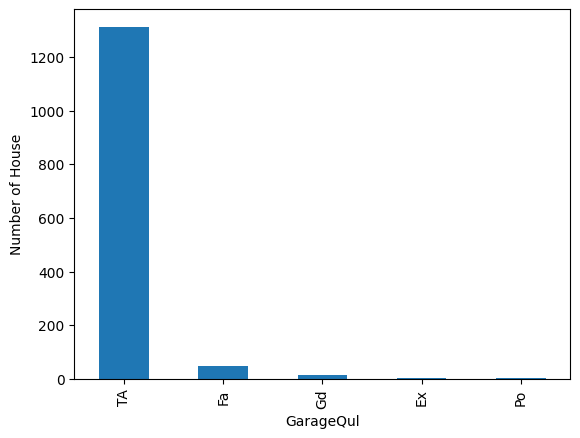

In [5]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel("GarageQul")
plt.ylabel("Number of House")
plt.show()

In [6]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

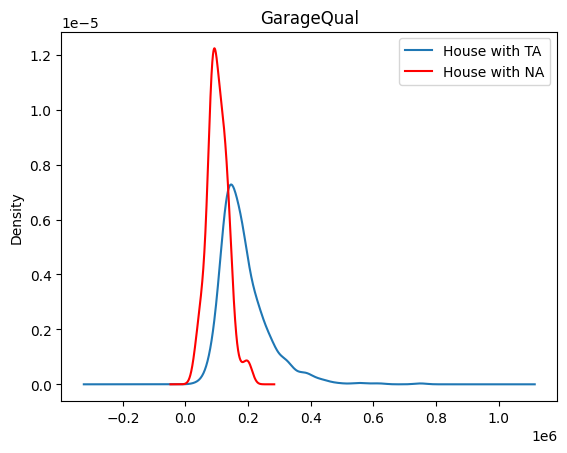

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

labels = ['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

plt.show()

In [8]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [9]:
df['GarageQual'].fillna('TA', inplace=True)

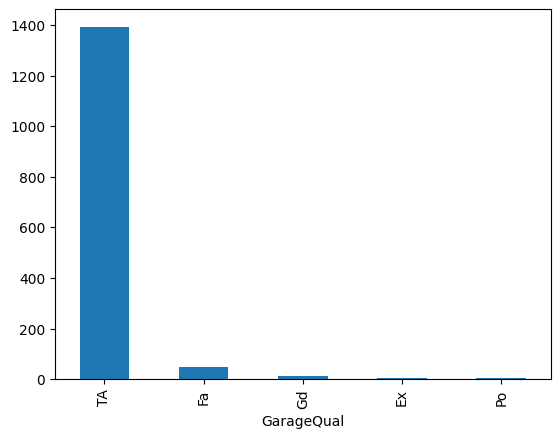

In [10]:
df['GarageQual'].value_counts().plot(kind='bar')
plt.show()

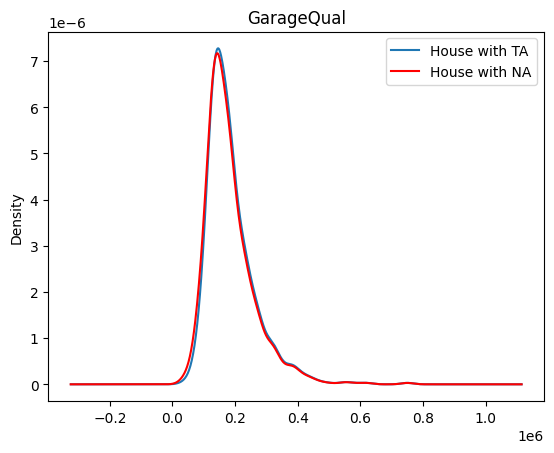

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

labels = ['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

plt.show()

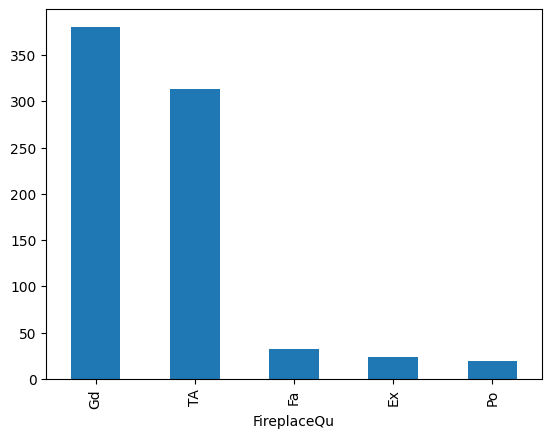

In [12]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

In [13]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

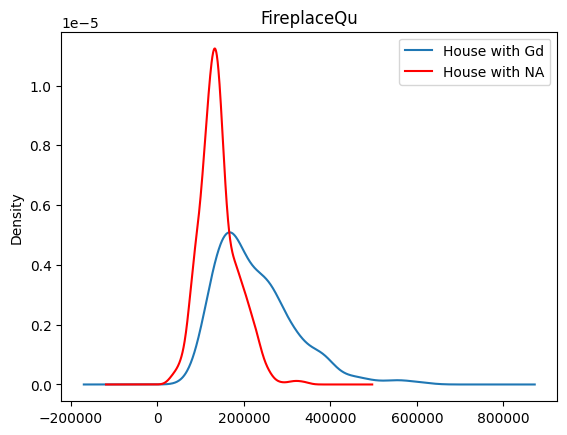

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

plt.show()

In [15]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [16]:
df['FireplaceQu'].fillna('Gd', inplace=True)

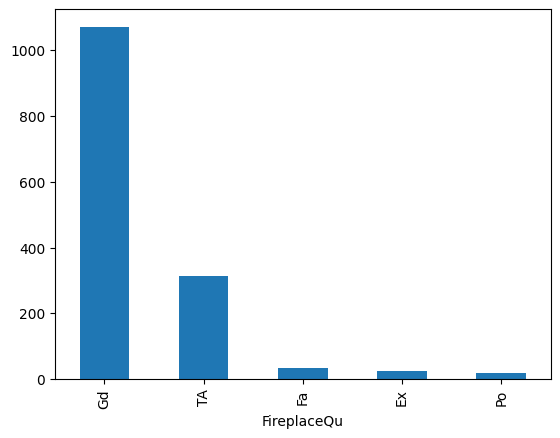

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

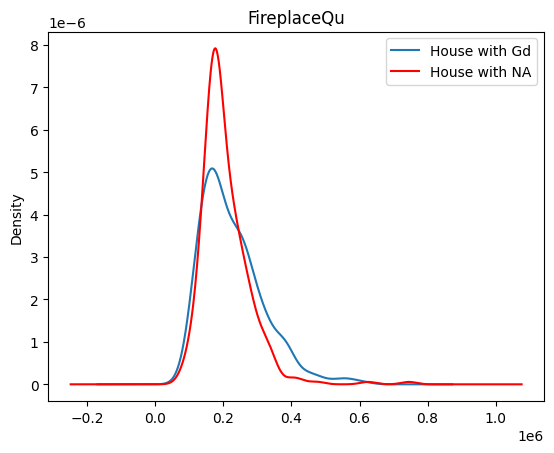

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

plt.show()

### __Using Sklearn__

In [19]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X.shape, y.shape

((1460, 2), (1460,))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
imputer.statistics_

array(['Gd', 'TA'], dtype=object)